In [2]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0


In [3]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 503 kB 71.5 MB/s 
     |████████████████████████████████| 3.8 MB 30.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8949141215bd8b844bdcd7bb2f7490f67645ca096f379f28101ef3b85bec992e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [7]:
# 옵션 설정

learning_rate = 0.01
total_epoch = 100
batch_size = 100
encoder_layer = 256 
n_hidden = 128
decoder_layer = 256 
n_input = 28 * 28

In [8]:
# 신경망 모델 구성

X = tf.placeholder(tf.float32, [None, n_input])

In [9]:
W_encode = tf.Variable(tf.random_normal([n_input, encoder_layer]))
W_encode2 = tf.Variable(tf.random_normal([encoder_layer, n_hidden]))
b_encode = tf.Variable(tf.random_normal([encoder_layer]))
b_encode2 = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))
encoder2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_encode2), b_encode2))

In [10]:
W_decode = tf.Variable(tf.random_normal([n_hidden, decoder_layer]))
W_decode2 = tf.Variable(tf.random_normal([decoder_layer, n_input]))
b_decode = tf.Variable(tf.random_normal([decoder_layer]))
b_decode2 = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder2, W_decode), b_decode))
decoder2 = tf.nn.sigmoid(tf.add(tf.matmul(decoder, W_decode2), b_decode2))

In [11]:
cost = tf.reduce_mean(tf.pow(X-decoder2, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# 신경망 모델 학습

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(total_epoch):
  total_cost = 0

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})

    total_cost += cost_val
  
  print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.
        format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.1009
Epoch: 0002 Avg. cost =  0.0784
Epoch: 0003 Avg. cost =  0.0722
Epoch: 0004 Avg. cost =  0.0689
Epoch: 0005 Avg. cost =  0.0643
Epoch: 0006 Avg. cost =  0.0617
Epoch: 0007 Avg. cost =  0.0599
Epoch: 0008 Avg. cost =  0.0593
Epoch: 0009 Avg. cost =  0.0587
Epoch: 0010 Avg. cost =  0.0580
Epoch: 0011 Avg. cost =  0.0575
Epoch: 0012 Avg. cost =  0.0570
Epoch: 0013 Avg. cost =  0.0566
Epoch: 0014 Avg. cost =  0.0563
Epoch: 0015 Avg. cost =  0.0561
Epoch: 0016 Avg. cost =  0.0558
Epoch: 0017 Avg. cost =  0.0556
Epoch: 0018 Avg. cost =  0.0554
Epoch: 0019 Avg. cost =  0.0553
Epoch: 0020 Avg. cost =  0.0546
Epoch: 0021 Avg. cost =  0.0544
Epoch: 0022 Avg. cost =  0.0543
Epoch: 0023 Avg. cost =  0.0543
Epoch: 0024 Avg. cost =  0.0541
Epoch: 0025 Avg. cost =  0.0540
Epoch: 0026 Avg. cost =  0.0540
Epoch: 0027 Avg. cost =  0.0539
Epoch: 0028 Avg. cost =  0.0538
Epoch: 0029 Avg. cost =  0.0537
Epoch: 0030 Avg. cost =  0.0537
Epoch: 0031 Avg. cost =  0.0536
Epoch: 0

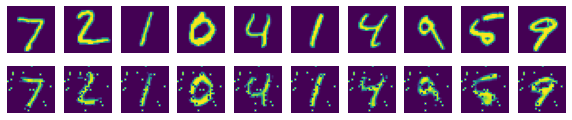

In [13]:
# 결과 확인

sample_size = 10
samples = sess.run(decoder2, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

plt.show()